In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys

In [2]:
sys.path.append('..')

In [3]:
from ers.base import ERS
from ers.models import NonLinearAR

In [22]:
T = 100
alpha=0.9
sv=0.3
sw=0.1
d=2

model = NonLinearAR(dimension=d, alpha=alpha, sv=sv, sw=sw)

In [23]:
xtrue = np.zeros((T,d))
y = np.zeros((T,d))

xtrue[0,:] = np.random.randn(d)
y[0] = xtrue[0]+sw*np.random.randn(1);

for t in range(2,T):
    xtrue[t] = alpha * np.tanh(xtrue[t-1]) + sv * np.random.randn(d)
    y[t] = xtrue[t] + sw * np.random.randn(d)

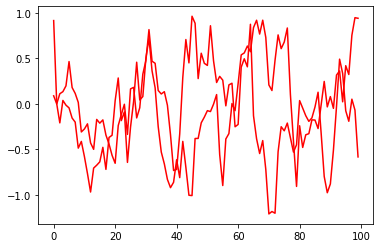

In [24]:
plt.plot(xtrue, color = 'red')

In [7]:
n_samples = 2
accepted_x, cand_x, n_trial = model.sample_n(n_samples=n_samples, n_particles=2500, T=T, y=y)

 50%|█████     | 1/2 [00:04<00:04,  4.09s/it]

0


100%|██████████| 2/2 [00:08<00:00,  4.48s/it]

1


In [8]:
n_samples/ n_trial

1.0

In [9]:
average_x = np.mean(accepted_x, axis=0)

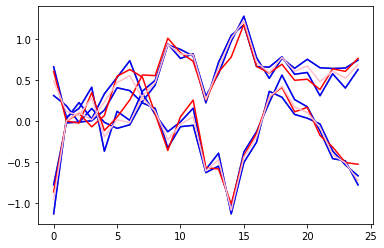

In [10]:
for i in range(cand_x.shape[0]):
    plt.plot(cand_x[i,:,:], color = 'gray')
    
for i in range(accepted_x.shape[0]):
    plt.plot(accepted_x[i,:,:], color = 'blue')

plt.plot(xtrue, color = 'red')
plt.plot(average_x, color = 'pink')

In [11]:
 from pathos.multiprocessing import ProcessingPool as Pool

In [12]:
import time

In [13]:
# run in parallel
start = time.time()
num_workers = 3
n_samples = 100
n_particles = 2000
f = lambda x : model.sample_n(n_samples=n_samples, n_particles=n_particles, T=T, y=y)
with Pool(num_workers) as p:
        out = p.map(f, range(num_workers))
time.time()-start

  0%|          | 0/100 [00:00<?, ?it/s]

0


  1%|          | 1/100 [00:09<15:57,  9.67s/it]

0


  1%|          | 1/100 [00:10<17:21, 10.52s/it]

0


  1%|          | 1/100 [00:11<18:28, 11.20s/it]

1


  2%|▏         | 2/100 [00:19<16:06,  9.86s/it]

1


  2%|▏         | 2/100 [00:21<17:15, 10.56s/it]

1


  2%|▏         | 2/100 [00:21<17:58, 11.00s/it]

2


  3%|▎         | 3/100 [00:31<16:43, 10.34s/it]

2


  3%|▎         | 3/100 [00:31<16:32, 10.23s/it]

2


  3%|▎         | 3/100 [00:32<17:34, 10.87s/it]

3


  4%|▍         | 4/100 [00:42<16:57, 10.60s/it]

3


  4%|▍         | 4/100 [00:42<17:11, 10.74s/it]

3


  4%|▍         | 4/100 [00:42<17:16, 10.80s/it]

4


  5%|▌         | 5/100 [00:54<17:20, 10.96s/it]

4


  5%|▌         | 5/100 [00:55<17:51, 11.28s/it]

4


  5%|▌         | 5/100 [00:56<18:14, 11.52s/it]

5


  6%|▌         | 6/100 [01:17<23:07, 14.77s/it]

5


  6%|▌         | 6/100 [01:19<23:48, 15.20s/it]

5


  6%|▌         | 6/100 [01:20<23:58, 15.30s/it]

6


  7%|▋         | 7/100 [02:40<54:30, 35.17s/it]

6


  7%|▋         | 7/100 [02:42<54:41, 35.29s/it]

6


  7%|▋         | 7/100 [02:43<55:35, 35.86s/it]

7


  8%|▊         | 8/100 [02:53<43:30, 28.37s/it]

7


  8%|▊         | 8/100 [02:53<43:20, 28.26s/it]

7


  8%|▊         | 8/100 [02:55<43:59, 28.69s/it]

8


  9%|▉         | 9/100 [03:05<35:16, 23.26s/it]

8


  9%|▉         | 9/100 [03:05<35:52, 23.66s/it]

8


  9%|▉         | 9/100 [03:07<35:58, 23.72s/it]

9


 10%|█         | 10/100 [03:17<29:49, 19.88s/it]

9


 10%|█         | 10/100 [03:18<30:25, 20.28s/it]

9


 10%|█         | 10/100 [03:19<30:11, 20.13s/it]

10


 11%|█         | 11/100 [03:41<31:08, 21.00s/it]

10


 11%|█         | 11/100 [03:41<31:22, 21.16s/it]

10


 11%|█         | 11/100 [03:42<31:10, 21.02s/it]

11


 12%|█▏        | 12/100 [04:04<31:58, 21.81s/it]

11


 12%|█▏        | 12/100 [04:05<31:43, 21.63s/it]

11


 12%|█▏        | 12/100 [04:06<32:41, 22.29s/it]

12


 13%|█▎        | 13/100 [04:16<27:22, 18.88s/it]

12


 13%|█▎        | 13/100 [04:17<27:04, 18.68s/it]

12


 13%|█▎        | 13/100 [04:18<27:39, 19.08s/it]

13


 14%|█▍        | 14/100 [04:40<28:57, 20.20s/it]

13


 14%|█▍        | 14/100 [04:41<28:53, 20.16s/it]

13


 14%|█▍        | 14/100 [04:41<29:27, 20.55s/it]

14


 15%|█▌        | 15/100 [04:52<25:04, 17.70s/it]

14


 15%|█▌        | 15/100 [04:52<25:19, 17.87s/it]

14


 15%|█▌        | 15/100 [04:53<25:24, 17.94s/it]

15


 16%|█▌        | 16/100 [05:17<27:33, 19.69s/it]

15


 16%|█▌        | 16/100 [05:17<27:43, 19.80s/it]

15


 16%|█▌        | 16/100 [05:17<27:31, 19.67s/it]

16


 17%|█▋        | 17/100 [05:28<23:52, 17.26s/it]

16


 17%|█▋        | 17/100 [05:29<23:48, 17.21s/it]

16


 17%|█▋        | 17/100 [05:29<24:16, 17.55s/it]

17


 18%|█▊        | 18/100 [06:03<30:38, 22.42s/it]

17


 18%|█▊        | 18/100 [06:05<31:31, 23.06s/it]

17


 18%|█▊        | 18/100 [06:05<31:36, 23.13s/it]

18


 19%|█▉        | 19/100 [06:14<25:49, 19.13s/it]

18


 19%|█▉        | 19/100 [06:18<26:53, 19.92s/it]

18


 19%|█▉        | 19/100 [06:18<26:57, 19.97s/it]

19


 20%|██        | 20/100 [06:26<22:31, 16.90s/it]

19


 20%|██        | 20/100 [06:30<23:20, 17.50s/it]

19


 20%|██        | 20/100 [06:30<23:25, 17.57s/it]

20


 21%|██        | 21/100 [06:38<20:31, 15.58s/it]

20


 21%|██        | 21/100 [06:41<20:45, 15.77s/it]

20


 21%|██        | 21/100 [06:42<21:04, 16.01s/it]

21


 22%|██▏       | 22/100 [07:02<23:32, 18.11s/it]

21


 22%|██▏       | 22/100 [07:05<23:39, 18.20s/it]

21


 22%|██▏       | 22/100 [07:06<23:48, 18.32s/it]

22


 23%|██▎       | 23/100 [07:14<20:54, 16.29s/it]

22


 23%|██▎       | 23/100 [07:17<20:55, 16.30s/it]

22


 23%|██▎       | 23/100 [07:18<20:59, 16.35s/it]

23


 24%|██▍       | 24/100 [07:37<23:14, 18.35s/it]

23


 24%|██▍       | 24/100 [07:41<23:25, 18.49s/it]

23


 24%|██▍       | 24/100 [07:43<24:04, 19.01s/it]

24


 25%|██▌       | 25/100 [07:49<20:28, 16.38s/it]

24


 25%|██▌       | 25/100 [07:53<20:42, 16.57s/it]

24


 25%|██▌       | 25/100 [07:55<20:59, 16.80s/it]

25


 26%|██▌       | 26/100 [08:01<18:28, 14.97s/it]

25


 26%|██▌       | 26/100 [08:04<18:26, 14.95s/it]

25


 26%|██▌       | 26/100 [08:07<19:14, 15.60s/it]

26


 27%|██▋       | 27/100 [08:12<16:46, 13.79s/it]

26


 27%|██▋       | 27/100 [08:15<16:51, 13.86s/it]

26


 27%|██▋       | 27/100 [08:20<17:55, 14.73s/it]

27


 28%|██▊       | 28/100 [08:36<20:04, 16.72s/it]

27


 28%|██▊       | 28/100 [08:39<20:03, 16.71s/it]

27


 28%|██▊       | 28/100 [08:43<20:29, 17.07s/it]

28


 29%|██▉       | 29/100 [08:47<18:00, 15.22s/it]

28


 29%|██▉       | 29/100 [08:51<18:17, 15.46s/it]

28


 29%|██▉       | 29/100 [08:54<18:05, 15.29s/it]

29


 30%|███       | 30/100 [08:59<16:35, 14.22s/it]

29


 30%|███       | 30/100 [09:04<16:59, 14.56s/it]

29


 30%|███       | 30/100 [09:05<16:21, 14.02s/it]

30


 31%|███       | 31/100 [09:12<15:55, 13.85s/it]

30


 31%|███       | 31/100 [09:16<15:55, 13.85s/it]

30


 31%|███       | 31/100 [09:17<15:20, 13.33s/it]

31


 32%|███▏      | 32/100 [09:24<14:59, 13.23s/it]

31


 32%|███▏      | 32/100 [09:28<15:13, 13.43s/it]

31


 32%|███▏      | 32/100 [09:29<14:48, 13.06s/it]

32


 33%|███▎      | 33/100 [09:35<14:13, 12.73s/it]

32


 33%|███▎      | 33/100 [09:40<14:27, 12.95s/it]

32


 33%|███▎      | 33/100 [09:41<14:22, 12.88s/it]

33


 34%|███▍      | 34/100 [10:11<21:27, 19.50s/it]

33


 34%|███▍      | 34/100 [10:13<20:57, 19.05s/it]

33


 34%|███▍      | 34/100 [10:19<22:25, 20.39s/it]

34


 35%|███▌      | 35/100 [10:58<30:08, 27.82s/it]

34


 35%|███▌      | 35/100 [11:02<30:10, 27.85s/it]

34


 35%|███▌      | 35/100 [11:07<30:55, 28.55s/it]

35


 36%|███▌      | 36/100 [11:10<24:30, 22.97s/it]

35


 36%|███▌      | 36/100 [11:14<24:41, 23.15s/it]

35


 36%|███▌      | 36/100 [11:19<25:07, 23.55s/it]

36


 37%|███▋      | 37/100 [12:10<35:51, 34.15s/it]

36


 37%|███▋      | 37/100 [12:12<35:23, 33.71s/it]

36


 37%|███▋      | 37/100 [12:19<36:11, 34.47s/it]

37


 38%|███▊      | 38/100 [12:33<31:44, 30.73s/it]

37


 38%|███▊      | 38/100 [12:36<31:39, 30.63s/it]

37


 38%|███▊      | 38/100 [12:44<32:36, 31.55s/it]

38


 39%|███▉      | 39/100 [13:19<35:56, 35.36s/it]

38


 39%|███▉      | 39/100 [13:24<36:26, 35.85s/it]

38


 39%|███▉      | 39/100 [13:31<36:57, 36.36s/it]

39


 40%|████      | 40/100 [13:31<28:28, 28.48s/it]

39


 40%|████      | 40/100 [13:35<28:27, 28.46s/it]

40


 41%|████      | 41/100 [13:43<23:09, 23.55s/it]

39


 40%|████      | 40/100 [13:44<29:14, 29.25s/it]

40


 41%|████      | 41/100 [13:46<22:51, 23.25s/it]

40


 41%|████      | 41/100 [13:55<23:32, 23.93s/it]

41


 42%|████▏     | 42/100 [14:06<22:24, 23.18s/it]

41


 42%|████▏     | 42/100 [14:12<23:16, 24.07s/it]

42


 43%|████▎     | 43/100 [14:18<18:57, 19.96s/it]

41


 42%|████▏     | 42/100 [14:18<22:53, 23.68s/it]

42


 43%|████▎     | 43/100 [14:25<19:45, 20.80s/it]

43


 44%|████▍     | 44/100 [14:30<16:16, 17.44s/it]

42


 43%|████▎     | 43/100 [14:30<19:07, 20.14s/it]

43


 44%|████▍     | 44/100 [14:37<16:51, 18.07s/it]

44


 45%|████▌     | 45/100 [14:41<14:28, 15.78s/it]

43


 44%|████▍     | 44/100 [14:43<16:40, 17.87s/it]

44


 45%|████▌     | 45/100 [14:48<14:45, 16.11s/it]

45


 46%|████▌     | 46/100 [14:54<13:18, 14.80s/it]

44


 45%|████▌     | 45/100 [14:55<14:42, 16.04s/it]

45


 46%|████▌     | 46/100 [15:01<13:29, 15.00s/it]

45


 46%|████▌     | 46/100 [15:07<13:29, 14.99s/it]

46


 47%|████▋     | 47/100 [15:19<15:41, 17.76s/it]

46


 47%|████▋     | 47/100 [15:24<15:29, 17.55s/it]

46


 47%|████▋     | 47/100 [15:30<15:19, 17.34s/it]

47


 48%|████▊     | 48/100 [15:44<17:24, 20.09s/it]

47


 48%|████▊     | 48/100 [15:49<17:02, 19.66s/it]

47


 48%|████▊     | 48/100 [15:54<16:43, 19.30s/it]

48


 49%|████▉     | 49/100 [15:56<14:54, 17.54s/it]

48


 49%|████▉     | 49/100 [16:01<14:42, 17.30s/it]

48


 49%|████▉     | 49/100 [16:06<14:41, 17.28s/it]

49


 50%|█████     | 50/100 [16:07<13:08, 15.77s/it]

49


 50%|█████     | 50/100 [16:13<13:10, 15.81s/it]

49


 50%|█████     | 50/100 [16:18<12:55, 15.51s/it]

50


 51%|█████     | 51/100 [16:32<14:57, 18.32s/it]

50


 51%|█████     | 51/100 [16:37<14:50, 18.17s/it]

50


 51%|█████     | 51/100 [16:44<15:15, 18.68s/it]

51


 52%|█████▏    | 52/100 [17:53<29:51, 37.32s/it]

51


 52%|█████▏    | 52/100 [18:00<30:12, 37.77s/it]

52


 53%|█████▎    | 53/100 [18:05<23:07, 29.51s/it]

51


 52%|█████▏    | 52/100 [18:09<30:52, 38.59s/it]

52


 53%|█████▎    | 53/100 [18:12<23:32, 30.06s/it]

53


 54%|█████▍    | 54/100 [18:15<18:15, 23.81s/it]

52


 53%|█████▎    | 53/100 [18:20<23:49, 30.41s/it]

53


 54%|█████▍    | 54/100 [18:24<18:44, 24.45s/it]

54


 55%|█████▌    | 55/100 [18:27<15:13, 20.29s/it]

53


 54%|█████▍    | 54/100 [18:30<18:34, 24.23s/it]

54


 55%|█████▌    | 55/100 [18:36<15:33, 20.73s/it]

55


 56%|█████▌    | 56/100 [18:40<13:07, 17.89s/it]

54


 55%|█████▌    | 55/100 [18:42<15:23, 20.52s/it]

55


 56%|█████▌    | 56/100 [18:48<13:15, 18.09s/it]

56


 57%|█████▋    | 57/100 [18:51<11:33, 16.12s/it]

55


 56%|█████▌    | 56/100 [18:53<13:03, 17.80s/it]

56


 57%|█████▋    | 57/100 [18:59<11:37, 16.21s/it]

57


 58%|█████▊    | 58/100 [19:04<10:28, 14.97s/it]

56


 57%|█████▋    | 57/100 [19:06<11:40, 16.28s/it]

57


 58%|█████▊    | 58/100 [19:11<10:19, 14.75s/it]

58


 59%|█████▉    | 59/100 [19:16<09:39, 14.14s/it]

57


 58%|█████▊    | 58/100 [19:18<10:31, 15.03s/it]

58


 59%|█████▉    | 59/100 [19:23<09:29, 13.89s/it]

59


 60%|██████    | 60/100 [19:27<08:49, 13.25s/it]

58


 59%|█████▉    | 59/100 [19:30<09:40, 14.17s/it]

59


 60%|██████    | 60/100 [19:34<08:50, 13.27s/it]

60


 61%|██████    | 61/100 [19:38<08:11, 12.60s/it]

59


 60%|██████    | 60/100 [19:43<09:04, 13.61s/it]

60


 61%|██████    | 61/100 [19:47<08:28, 13.05s/it]

61


 62%|██████▏   | 62/100 [19:48<07:30, 11.86s/it]

60


 61%|██████    | 61/100 [19:54<08:28, 13.04s/it]

61


 62%|██████▏   | 62/100 [19:59<08:01, 12.68s/it]

62


 63%|██████▎   | 63/100 [20:01<07:21, 11.94s/it]

61


 62%|██████▏   | 62/100 [20:06<08:00, 12.64s/it]

62


 63%|██████▎   | 63/100 [20:10<07:32, 12.23s/it]

63


 64%|██████▍   | 64/100 [20:13<07:10, 11.96s/it]

62


 63%|██████▎   | 63/100 [20:19<07:46, 12.60s/it]

63


 64%|██████▍   | 64/100 [20:22<07:14, 12.08s/it]

64


 65%|██████▌   | 65/100 [20:25<07:04, 12.12s/it]

63


 64%|██████▍   | 64/100 [20:30<07:20, 12.25s/it]

64


 65%|██████▌   | 65/100 [20:34<07:03, 12.10s/it]

65


 66%|██████▌   | 66/100 [20:37<06:51, 12.11s/it]

64


 65%|██████▌   | 65/100 [20:42<07:10, 12.29s/it]

65


 66%|██████▌   | 66/100 [20:46<06:55, 12.22s/it]

66


 67%|██████▋   | 67/100 [20:49<06:34, 11.96s/it]

65


 66%|██████▌   | 66/100 [20:54<06:52, 12.13s/it]

66


 67%|██████▋   | 67/100 [20:59<06:43, 12.23s/it]

67


 68%|██████▊   | 68/100 [21:01<06:22, 11.94s/it]

66


 67%|██████▋   | 67/100 [21:06<06:41, 12.16s/it]

67


 68%|██████▊   | 68/100 [21:10<06:21, 11.93s/it]

67


 68%|██████▊   | 68/100 [21:18<06:25, 12.05s/it]

68


 69%|██████▉   | 69/100 [21:24<08:01, 15.53s/it]

68


 69%|██████▉   | 69/100 [21:34<08:05, 15.66s/it]

69


 70%|███████   | 70/100 [21:37<07:16, 14.54s/it]

68


 69%|██████▉   | 69/100 [21:43<08:09, 15.78s/it]

69


 70%|███████   | 70/100 [21:46<07:16, 14.55s/it]

70


 71%|███████   | 71/100 [21:49<06:43, 13.90s/it]

69


 70%|███████   | 70/100 [21:55<07:18, 14.63s/it]

70


 71%|███████   | 71/100 [21:58<06:38, 13.74s/it]

71


 72%|███████▏  | 72/100 [22:01<06:10, 13.22s/it]

70


 71%|███████   | 71/100 [22:07<06:45, 13.98s/it]

71


 72%|███████▏  | 72/100 [22:10<06:07, 13.14s/it]

72


 73%|███████▎  | 73/100 [22:12<05:43, 12.73s/it]

71


 72%|███████▏  | 72/100 [22:19<06:17, 13.49s/it]

72


 73%|███████▎  | 73/100 [22:22<05:43, 12.73s/it]

73


 74%|███████▍  | 74/100 [22:25<05:32, 12.78s/it]

72


 73%|███████▎  | 73/100 [22:30<05:41, 12.66s/it]

73


 74%|███████▍  | 74/100 [22:34<05:27, 12.59s/it]

74


 75%|███████▌  | 75/100 [22:37<05:15, 12.60s/it]

73


 74%|███████▍  | 74/100 [22:41<05:18, 12.25s/it]

74


 75%|███████▌  | 75/100 [22:46<05:10, 12.41s/it]

75


 76%|███████▌  | 76/100 [22:50<04:59, 12.46s/it]

74


 75%|███████▌  | 75/100 [22:53<05:01, 12.08s/it]

75


 76%|███████▌  | 76/100 [22:57<04:48, 12.01s/it]

76


 77%|███████▋  | 77/100 [23:02<04:43, 12.31s/it]

75


 76%|███████▌  | 76/100 [23:05<04:48, 12.03s/it]

76


 77%|███████▋  | 77/100 [23:09<04:39, 12.17s/it]

77


 78%|███████▊  | 78/100 [23:14<04:32, 12.37s/it]

76


 77%|███████▋  | 77/100 [23:17<04:32, 11.86s/it]

77


 78%|███████▊  | 78/100 [23:20<04:19, 11.79s/it]

78


 79%|███████▉  | 79/100 [23:27<04:20, 12.42s/it]

77


 78%|███████▊  | 78/100 [23:29<04:24, 12.03s/it]

78


 79%|███████▉  | 79/100 [23:32<04:06, 11.76s/it]

78


 79%|███████▉  | 79/100 [23:40<04:08, 11.84s/it]

79


 80%|████████  | 80/100 [23:51<05:20, 16.00s/it]

79


 80%|████████  | 80/100 [23:55<05:03, 15.18s/it]

80


 81%|████████  | 81/100 [24:04<04:44, 14.99s/it]

79


 80%|████████  | 80/100 [24:04<05:08, 15.41s/it]

80


 81%|████████  | 81/100 [24:07<04:29, 14.20s/it]

81


 82%|████████▏ | 82/100 [24:16<04:14, 14.13s/it]

80


 81%|████████  | 81/100 [24:16<04:31, 14.27s/it]

81


 82%|████████▏ | 82/100 [24:19<04:04, 13.60s/it]

81


 82%|████████▏ | 82/100 [24:27<04:01, 13.42s/it]

82


 83%|████████▎ | 83/100 [24:28<03:50, 13.53s/it]

82


 83%|████████▎ | 83/100 [24:31<03:41, 13.06s/it]

82


 83%|████████▎ | 83/100 [24:39<03:41, 13.06s/it]

83


 84%|████████▍ | 84/100 [24:40<03:31, 13.24s/it]

83


 84%|████████▍ | 84/100 [24:43<03:22, 12.65s/it]

83


 84%|████████▍ | 84/100 [24:52<03:24, 12.79s/it]

84


 85%|████████▌ | 85/100 [25:04<04:06, 16.46s/it]

84


 85%|████████▌ | 85/100 [25:07<04:02, 16.15s/it]

84


 85%|████████▌ | 85/100 [25:16<04:05, 16.34s/it]

85


 86%|████████▌ | 86/100 [25:16<03:31, 15.14s/it]

85


 86%|████████▌ | 86/100 [25:19<03:29, 14.99s/it]

85


 86%|████████▌ | 86/100 [25:29<03:32, 15.21s/it]

86


 87%|████████▋ | 87/100 [25:52<04:36, 21.27s/it]

86


 87%|████████▋ | 87/100 [25:55<04:34, 21.10s/it]

87


 88%|████████▊ | 88/100 [26:05<03:44, 18.71s/it]

87


 88%|████████▊ | 88/100 [26:07<03:41, 18.43s/it]

86


 87%|████████▋ | 87/100 [26:07<04:49, 22.26s/it]

88


 89%|████████▉ | 89/100 [26:18<03:06, 16.97s/it]

88


 89%|████████▉ | 89/100 [26:20<03:03, 16.69s/it]

87


 88%|████████▊ | 88/100 [26:20<03:51, 19.30s/it]

89


 90%|█████████ | 90/100 [26:29<02:33, 15.38s/it]

89


 90%|█████████ | 90/100 [26:31<02:31, 15.14s/it]

88


 89%|████████▉ | 89/100 [26:31<03:07, 17.02s/it]

90


 91%|█████████ | 91/100 [26:42<02:10, 14.46s/it]

90


 91%|█████████ | 91/100 [26:42<02:05, 13.95s/it]

89


 90%|█████████ | 90/100 [26:44<02:36, 15.60s/it]

91


 92%|█████████▏| 92/100 [26:54<01:49, 13.75s/it]

91


 92%|█████████▏| 92/100 [26:55<01:47, 13.47s/it]

90


 91%|█████████ | 91/100 [26:56<02:11, 14.64s/it]

92


 93%|█████████▎| 93/100 [27:05<01:32, 13.14s/it]

92


 93%|█████████▎| 93/100 [27:07<01:31, 13.07s/it]

91


 92%|█████████▏| 92/100 [27:09<01:53, 14.14s/it]

93


 94%|█████████▍| 94/100 [27:18<01:15, 12.50s/it]

93


 94%|█████████▍| 94/100 [27:18<01:18, 13.10s/it]

92


 93%|█████████▎| 93/100 [27:22<01:36, 13.74s/it]

94


 95%|█████████▌| 95/100 [27:30<01:02, 12.46s/it]

94


 95%|█████████▌| 95/100 [27:31<01:04, 12.93s/it]

93


 94%|█████████▍| 94/100 [27:34<01:19, 13.30s/it]

95


 96%|█████████▌| 96/100 [27:42<00:49, 12.44s/it]

95


 96%|█████████▌| 96/100 [27:43<00:50, 12.52s/it]

94


 95%|█████████▌| 95/100 [27:47<01:05, 13.14s/it]

96


 97%|█████████▋| 97/100 [27:55<00:37, 12.40s/it]

96


 97%|█████████▋| 97/100 [27:55<00:37, 12.37s/it]

95


 96%|█████████▌| 96/100 [27:59<00:50, 12.73s/it]

96


 97%|█████████▋| 97/100 [28:11<00:38, 12.71s/it]

97


 98%|█████████▊| 98/100 [28:32<00:39, 19.78s/it]

97


 98%|█████████▊| 98/100 [28:32<00:39, 19.97s/it]

97


 98%|█████████▊| 98/100 [28:46<00:38, 19.39s/it]

98


 99%|█████████▉| 99/100 [28:55<00:20, 20.90s/it]

98


 99%|█████████▉| 99/100 [28:56<00:21, 21.09s/it]

98


 99%|█████████▉| 99/100 [29:11<00:21, 21.00s/it]

99


100%|██████████| 100/100 [29:19<00:00, 17.60s/it]


99


100%|██████████| 100/100 [29:20<00:00, 17.60s/it]


99


100%|██████████| 100/100 [29:26<00:00, 17.67s/it]


1767.0030934810638

Process ForkPoolWorker-2:
Process ForkPoolWorker-1:
Traceback (most recent call last):
  File "/data/hylia/thornton/miniconda3/envs/venv/lib/python3.8/site-packages/multiprocess/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/data/hylia/thornton/miniconda3/envs/venv/lib/python3.8/site-packages/multiprocess/process.py", line 315, in _bootstrap
    self.run()
Process ForkPoolWorker-3:
  File "/data/hylia/thornton/miniconda3/envs/venv/lib/python3.8/site-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/data/hylia/thornton/miniconda3/envs/venv/lib/python3.8/site-packages/multiprocess/pool.py", line 114, in worker
    task = get()
  File "/data/hylia/thornton/miniconda3/envs/venv/lib/python3.8/site-packages/multiprocess/queues.py", line 358, in get
    with self._rlock:
  File "/data/hylia/thornton/miniconda3/envs/venv/lib/python3.8/site-packages/multiprocess/synchronize.py", line 101, i

In [14]:
accepted_x = np.concatenate([out[i][0] for i in range(num_workers)])
cand_x = np.concatenate([out[i][1] for i in range(num_workers)])
average_x = np.mean(accepted_x, axis=0)

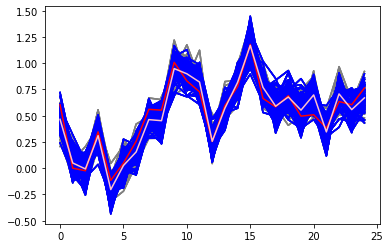

In [16]:
for i in range(cand_x.shape[0]):
    plt.plot(cand_x[i,:,0], color = 'gray')
    
for i in range(accepted_x.shape[0]):
    plt.plot(accepted_x[i,:,0], color = 'blue')

plt.plot(xtrue[:,0], color = 'red')
plt.plot(average_x[:,0], color = 'pink')

In [ ]:
from PIL import Image
import shutil


accepted_x, cand_x, n_trial = model.sample_n(n_samples=1, n_particles=1000, T=T, y=y)

number_trials = cand_x.shape[0]

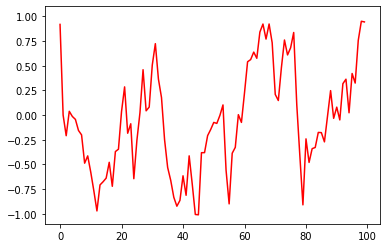

In [55]:
fig, ax = plt.subplots()

plt.ylim(-1.1,1.1)
ax.plot([], color = 'gray', label = 'Proposal')
ax.plot([], color = 'blue', label = 'Accepted')
ax.plot(xtrue[:,0], color = 'red', label = 'True latent state')

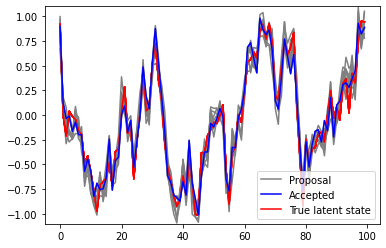

In [57]:

gif_dir = './gif_dir'
if os.path.isdir(gif_dir):
    shutil.rmtree(gif_dir) 
os.mkdir(gif_dir)

j = 0

fig, ax = plt.subplots()

plt.ylim(-1.1,1.1)
ax.plot([], color = 'gray', label = 'Proposal')
ax.plot([], color = 'blue', label = 'Accepted')
ax.plot(xtrue[:,0], color = 'red', label = 'True latent state')
ax.legend()
plt.savefig(os.path.join(gif_dir,'plot_{0}.png'.format(-1)))


for i in range(number_trials):
    plt.ylim(-1.1,1.1)
    ax.plot(xtrue[:,0], color = 'red', label = 'True latent state')
    ax.plot(cand_x[i,:,0], color = 'gray',label = 'Proposal')
    if (cand_x[i,:,0]==accepted_x[j,:,0]).all():
        ax.plot(accepted_x[0,:,0], color = 'blue', label = 'Accepted')
        j += 1
    plt.savefig(os.path.join(gif_dir,'plot_{0}.png'.format(i)))
    
    

In [58]:
fps = [os.path.join('./gif_dir', 'plot_{0}.png'.format(t)) for t in range(-1,number_trials)]
frames = [Image.open(fn) for fn in fps]
frames[0].save('pf.gif', format='GIF', append_images=frames[1:], save_all=True, duration=100, loop=0)